In [35]:
from regression import*

# DATA

In [22]:
# Load Data
target = 'center'
train_data_raw, validation_data_raw = DATA( dataset_name='synth_2coils', features='synth_vind', target=target).split(ratio=.95) 
test_data_synth_raw = DATA( dataset_name='arduino', features='synth_vind', target=target)
test_data_meas_raw = DATA( dataset_name='arduino', features='meas_vind', target=target)

In [32]:
# Process Data
def data_processing(data): 
    return data.segment(win_size=20, step=5).get_features()
    # return data.segment(win_size=20, step=5)

train_data = data_processing(train_data_raw).get_df(merge=True)
validation_data = data_processing(validation_data_raw).get_df(merge=False)
test_data_synth = data_processing(test_data_synth_raw).get_df(merge=False)
test_data_meas = data_processing(test_data_meas_raw).get_df(merge=False)

# MODEL

In [33]:
exp_reg = setup(train_data,
                train_size = .7,
                target = 'target', 
                normalize = True, 
                silent = True,
                feature_selection = True, 
                session_id = 0
                )   


Setup Succesfully Completed!


In [34]:
model = tune_model('lightgbm')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0373  0.0025  0.0498  0.7105  0.0338  0.0850
1     0.0371  0.0024  0.0494  0.7226  0.0335  0.0848
2     0.0368  0.0024  0.0494  0.7153  0.0336  0.0846
3     0.0372  0.0024  0.0494  0.7178  0.0336  0.0858
4     0.0364  0.0023  0.0483  0.7285  0.0328  0.0834
5     0.0371  0.0025  0.0495  0.7128  0.0337  0.0850
6     0.0372  0.0025  0.0496  0.7105  0.0337  0.0855
7     0.0367  0.0024  0.0493  0.7140  0.0336  0.0847
8     0.0374  0.0025  0.0499  0.7160  0.0339  0.0858
9     0.0368  0.0024  0.0492  0.7170  0.0335  0.0845
Mean  0.0370  0.0024  0.0494  0.7165  0.0336  0.0849
SD    0.0003  0.0000  0.0004  0.0053  0.0003  0.0007

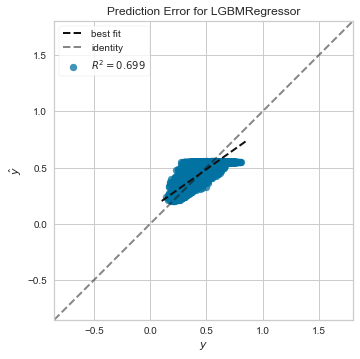

In [30]:
plot_model(model, plot='error')
# plot_model(model, plot='feature')

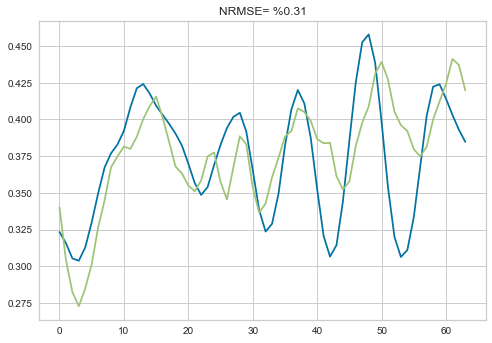

In [31]:
data = validation_data[4]
# data = test_data_synth[0]
# data = test_data_meas[0]

prediction = predict_model(model, data=data)
y_true = prediction.target.to_numpy()
y_pred = prediction.Label.to_numpy()
y_pred = signal.savgol_filter(y_pred, window_length=3, polyorder=1, axis=0)             

nrmse = round( mean_squared_error(y_true, y_pred) / np.nanmean(y_true) * 100, 2)

plt.plot(y_true)
plt.plot(y_pred)
plt.title( 'NRMSE= %' + str(nrmse) )
plt.show()


In [6]:
compare_models()

In [120]:
# dataset = load_dataset('arduino')
# for n, data in enumerate(dataset):
#     file_path = 'C:/Users/mixil/Desktop/MIHAR_Hardware/experiments/dataset/arduino/data_/record_' + "{0:0=2d}".format(n) + '.csv'
#     data = data.rename(columns={'vind_1':'meas_vind_1', 'vind_2':'meas_vind_2'})
#     data.to_csv(file_path, index=None) 